# Aula 05

Sumário

---

- Instalando o Python
- Criando e configurando um ambiente virtual
  - Ativando o ambiente virtual
  - Instalando as bibliotecas
- Repositório de bases de dados

---

1. Introdução
   1. Analisando o panorama geral
      1. Abordando o problema
   2. Obtendo os dados
      1. A base de dados que será utilizada no nosso exemplo
      2. Carregando os dados
   3. Identificando e visualizando os dados para obter informações úteis
      1. Visualização textual
         1. Método `head`
         2. Método `info`
         3. Método `value_counts`
         4. Método `describe`
      2. Visualização por gráficos
         1. Histograma
         2. *Scatter plot*
         3. Procurando por correlações
   4. Preparando os dados para os algoritmos de AM
      1. Separando os conjuntos de treinamento e teste
      2. Separando os previsores e rótulos
      3. Tratando *missing values*
      4. Lidando com atributos categóricos
      5. Escalonamento das características
         1. Padronização
         2. Normalização
   5. Selecionando e treinando um modelo*
   6. Aperfeiçoando o modelo*
   7. Apresentando a solução*
   8. Disponibilizando em produção, monitorando e fazendo a manutenção do sistema*

---

## Instalando o Python

Você pode encontrar o instalador do `Python` no site oficial dele: https://python.org. 

O recomendável é que você instale a versão 3.10 ou 3.11. O motivo para isso vem das bibliotecas que vamos instalar, as quais precisam se adaptar às novas versões para que possam funcionar adequadamente. Então, é sempre interessante ter uma versão anterior à última lançada, pois há mais garantias de que tudo vai funcionar como deve.

Durante ou depois da instalação, não esqueça de colocar o executável do `Python` no `PATH`. O `PATH` é uma `variável de ambiente`, e ter o endereço do executável do `Python` nessa variável vai permitir com que o seu computador reconheça os comandos da linguagem no terminal. Para verificar isso, abra um terminal e escreva:

```
python --version
```

Após apertar o enter, deverá aparecer a versão do `Python` instalada na sua máquina. Caso a versão não apareça, mas no lugar estiver uma mensagem de erro, então o executável do `Python` não está no `PATH`.

## Criando e configurando um ambiente virtual

Como vamos utilizar o `Python` e algumas das bibliotecas mais utilizadas para `Machine Learning` (ML), o recomendável é a criação e utilização de um `ambiente virtual`. O `ambiente virtual` serve como uma instalação à parte do `Python`, onde tudo o que você fizer estará restrito a esse ambiente. É muito importante para se evitar problemas de compatibilidade e dependência entre bilbiotecas. Explicando de uma forma "didática", o `ambiente virtual` vai ser uma pasta ou diretório específico para você aprender sobre ML.

Em sua instalação, o `Python` vem com o `venv`, um comando nativo para se criar um `ambiente virtual`, portanto, vamos utilizá-lo. Você deverá abrir um `terminal` (pode ser dentro do VS Code) ou `prompt de comando` (cmd), ou `PowerShell`. O comando para criar o `ambiente virtual` é o seguinte:

```
> python -m venv caminho/para/o/ambiente
```

O `caminho/para/o/ambiente`  pode ser um caminho completo, ou seja, desde o diretório raiz, ou um `caminho relativo`. No `Windows`, o caminho completo pode ser algo nesse sentido: `C:/Usuário/SeuNome/Programação/Nome_do_ambiente`. Portanto, caso você queira criar um `ambiente virtual` no caminho que citei como exemplo, você deverá escrever no termial:

```
> python -m venv C:/Usuário/SeuNome/Programação/Nome_do_ambiente
```

Porém, você pode também utilizar do `caminho relativo`. Um `caminho relativo` é o caminho de diretórios ou pastas a partir de onde você estiver no terminal. Por exemplo, assim que você abrir o **cmd**, provavelmente você verá algo nesse sentido:

```
C:/SeuNome > 
```

Ou seja, você já está na pasta **SeuNome**, a qual está no disco **C**. Portanto, caso você escreva o seguinte:

```
C:/SeuNome > python -m venv Nome_do_Ambiente
```

Uma pasta com o nome `Nome_do_Ambiente` será criada no seguinte caminho: `C:/SeuNome/`. Ou seja, dentro da pasta `SeuNome` você deverá encontrar a pasta `Nome_do_Ambiente`. Dentro desta última pasta, você verá outras que foram criadas automaticamente. São elas as pastas necessárias para você poder utilizar o `ambiente virtual`.

### Ativando o ambiente virtual

Uma vez que você criou o seu `ambiente virtual`, você deve entrar nessa página através do seu terminal (pode ser dentro do VS Code, ou cmd, ou PowerShell). Vamos supor que no seu terminal esteja aparecendo assim:

```
C:/SeuNome > 
```

Ou seja, o terminal está na pasta `SeuNome`. Então você vai entrar no seu ambiente da seguinte forma:

```
C:/SeuNome > cd Nome_do_Ambiente
```

Se der tudo certo, agora você verá o seguinte:

```
C:/SeuNome/Nome_do_Ambiente >
```

Agora que estamos na pasta correta, vamos ativar o ambiente virtual. Essa ativação é o que vai fazer com que toda instalação de bilbiotecas aconteça dentro do ambiente. Caso você esteja no Windows, você deverá escrever o seguinte:

```
C:/SeuNome/Nome_do_Ambiente > ./Scripts/activate
```

Se a ativação for bem sucedida, no seu terminal aparecerá o nome do seu ambiente da seguinte forma:

```
(Nome_do_Ambiente) C:/SeuNome/Nome_do_Ambiente >
```

Porém, se o nome não apareceu entre parênteses, ou veio alguma mensagem de erro, tente uma das duas opções a seguir (ou uma e depois a outra, caso a primeira não tenha dado certo também):

```
C:/SeuNome/Nome_do_Ambiente > ./Scripts/activate.bat
```

```
C:/SeuNome/Nome_do_Ambiente > ./Scripts/activate.ps1
```

Supondo que tenha dado tudo certo, e que o nome do seu `ambiente virtual` tenha aparecido entre parênteses, agora você estará pronto para instalar as bibliotecas.

### Instalando as bibliotecas

Antes de começarmos a instalação, vamos fazer uma última checagem. Vamos verificar se o `pip` que utilizaremos é o correto, pois pode acontecer que mesmo você tendo ativado corretamente seu `ambiente virtual`, o respectivo `pip` não foi ativado. O `pip` é um gerenciador de bibliotecas e pacotes, ou seja, você poderá utilizá-lo para instalar e desinstalar facilmente as bibliotecas necessárias. Para vermos se estamos com o `pip` correto, escreva o seguinte:

```
(Nome_do_Ambiente) C:/SeuNome/Nome_do_Ambiente > pip --version
```

Após você apertar o enter, deverá aparecer a versão do `pip` e também o caminho do seu executável. Se o caminho do seu executável estiver dentro da pasta do seu `ambiente virtual`, então tudo está correto.

Existem duas formas de você instalar as bibliotecas que utilizaremos: "manualmente" uma por uma, ou através de uma lista.

A instalação manual consiste no seguinte:

```
(Nome_do_Ambiente) C:/SeuNome/Nome_do_Ambiente > pip install nome_da_biblioteca
```

O `pip` vai procurar automaticamente em seu repositório a biblioteca informada e a instalará no seu `ambiente virtual`. Por enquanto, recomendo as seguintes bibliotecas: `pandas`, `matplotlib`, `scikit-learn` e, caso você esteja no VS Code, a biblioteca `ipykernel`.

Contudo, você pode verificar que neste repositório existe um arquivo chamado `requirements.txt`. Neste arquivo estão listadas todas as bibliotecas que estou utilizando, e suas respectivas versões. Para instalar então tudo o que está lá, você deverá escrever o seguinte no terminal:

```
(Nome_do_Ambiente) C:/SeuNome/Nome_do_Ambiente > pip install -r requirements.txt
```

Se tudo ocorrer como previsto, então você neste ponto estará com seu `ambiente virtual` criado e configurado. Mas tem uma última coisa importante: quando você terminar de estudar neste `ambiente virtual`, não esqueça de desativá-lo, para que você não bagunce com seus arquivos. Para desativar, basta escrever o seguinte no terminal:

```
(Nome_do_Ambiente) C:/SeuNome/Nome_do_Ambiente > deactivate
```

Após apertar o enter, se o nome do seu `ambiente virtual` entre parênteses desaparecer, então você o desativou com sucesso. Na próxima vez que precisar do `ambiente virtual` basta ativá-lo novamente como já vimos.

## Repositórios de bases de dados

As `bases de dados` das empresas são privadas, ou seja, restritas para uso interno. Entretanto, existem alguns sites que disponibilizam dezenas a centenas de `bases de dados` abertas, as quais podemos baixar para aprendermos os variados algoritmos de Aprendizado de Máquina (AM). Essas `bases de dados` abertas são utilizadas também como `benchmark` para novos modelos e métodos.

A seguir uma lista de repositórios:

* [UCI Irvine ML Repository](http://archive.ics.uci.edu/)
* [Kaggle](https://www.kaggle.com/datasets)
* [AWS](https://registry.opendata.aws/)

Metaportal de dados

* [Data Portals](http://dataportals.org/)

Páginas com listagem de repositórios

* [Wikipedia](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
* [Quora](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
* [Reddit](https://www.reddit.com/r/datasets)

## 1 Introdução

Vamos seguir o modelo didático do nosso livro-texto. Vamos simular todo um projeto de Aprendizado de Máquina como se fôssemos um cientista de dados contratado por uma empresa de mercado imobiliário. O passo-a-passo que seguiremos:

1. Analisar o panorama geral.
2. Obter os dados.
3. Identificar e visualizar os dados para obter informações úteis.
4. Preparar os dados para os algoritmos de AM.
5. Selecionar e treinar um modelo.
6. Aperfeiçoar o modelo.
7. Apresentar a solução.
8. Disponibilizar em produção, monitar e fazer a manutenção do sistema.

### 1.1 Analisando o Panorama Geral

Bem vindo à Companhia Habitacional. A primeira tarefa será criar um modelo de preços para o setor imobiliário usando os dados do censo do Estado da Califórnia. Esses dados têm indicadores como população, reda média e preço médio do imóvel para cada grupo de bairros. Os grupos de bairros são a menor unidade geográfica para a qual o Departamento de Censo dos Estados Unidos publica dados de amostra (um grupo de bairro geralmente comporta uma população de 600 a 3 mil pessoas). Para abreviar, os chamaremos de "regiões".

#### 1.1.1 Abordando o problema

Para começar, é interessante adquirir algumas informações sobre o problema, e o que se espera do modelo de AM. Um exemplo de perguntas: Qual é exatamente o objetivo do negócio? Como a empresa espera usar e se beneficar desse modelo?

Suponha que seu chefe tenha respondido o seguinte: "O objetivo do seu modelo é gerar uma predição do preço médio dos imóveis no bairro. Esses dados alimentarão outro sistema de aprendizado de máquina, junto com outros sinais. O sistema estabelecerá se vale a pena investir em uma área ou não".

<div style="text-align: center;">
    <img src="imagens/figura01.png"><br>
    <caption>Figura 01: Pipeline de aprendizado de máquina para investimentos imobiliários (fonte: livro-texto)</caption>
</div>

Outra informação importante é sabermos como é a solução atual, ou seja, como a empresa está adquirindo/gerando as predições antes do nosso modelo, caso exista. A resposta pode nos dar algum *insight* sobre o que fazer, com quem falar, ou apenas perceber que a empresa está necessitando mesmo de um modelo que a ajude nessa tarefa.

A partir de tudo o que vimos até agora, vamos responder as seguintes questões:

* Que tipo de aprendizado devemos usar: supervisionado, não-supervisionado, ou reforço?
  * <details><summary>Resposta</summary>Aprendizado Supervisionado</details>
* Qual será a tarefa do modelo: classificação, regressão, agrupamento, ou outra coisa?
  * <details><summary>Resposta</summary>Regressão</details>
* A apresentação dos dados será em *batch* ou *online*?
  * <details><summary>Resposta</summary>Batch</details>

### 1.2 Obtendo os dados

#### 1.2.1 A base de dados que será utilizada no nosso exemplo

Vamos seguir com o livro e utilizar a mesma base de dados. O `github` do autor é [Ageron](https://github.com/ageron). Os códigos utilizados por ele para a última versão do seu livro é a [Handson ML3](https://github.com/ageron/handson-ml3/tree/main). A base de dados que vamos utilizar está disponível [nesta página](https://github.com/ageron/data/tree/main/housing).

Para utilizar essa base você tem as seguintes opções:

1. Baixar (ou clonar) o repositório [data](https://github.com/ageron/data/tree/main), e depois pegar somente a base que você quer. Esse caso é o recomendado se você quer pegar logo todas as bases presentes no repositório.
2. Caso você esteja usando `Linux`, dá para seguir o passo-a-passo mostrado na célula 04 [deste arquivo](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb).
3. Baixar os arquivos `raw` e `md` isoladamente.

O autor fez uns poucos ajustes nos dados para efeitos didáticos.

#### 1.2.2 Carregando os dados

In [1]:
import pandas as pd

housing = pd.read_csv("../datasets/housing/housing.csv") # ao receber os dados, housing passa a ser um DataFrame

### 1.3 Identificando e visualizando os dados para obter informações úteis

#### 1.3.1 Visualização textual

##### 1.3.1.1 Método `head`

O método `head` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head)) pertence à biblioteca `Pandas` e mostra, por padrão, as cinco primeiras linhas da base dados carregada. Caso você queira ver outra quantidade de linhas, basta passar o valor numérico como parâmetro. Exemplo: `housing.head(10)`, vai mostrar as 10 primeiras linhas. De forma análoga, para ver as últimas linhas, basta executar o método `tail`.

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### 1.3.1.2 Método `info`

O método `info` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info)) mostra informações sobre um DataFrame, incluindo os índices e tipos de dados (`dtypes`) das colunas, quantidade de valores não nulos e uso de memória.

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### 1.3.1.3 Método `value_counts`

O método `value_counts` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts)) retorna um objeto do tipo `Series`, contendo a frequência de cada linha distinta em um `DataFrame`.

In [4]:
# Verificando quantas instâncias para cada valor categórico da coluna ocean_proximity
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

##### 1.3.1.4 Método `describe`

O método `describe` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)) descreve o `DataFrame` a partir de valores estatísticos.

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 1.3.2 Visualização por gráficos

A criação e visualização de gráficos pode ser de grande ajuda para conseguirmos detectar algum *insisght* ou padrão nos dados. Vamos começar pelo histograma.

##### 1.3.2.1 Histograma

Um `histograma` é uma representação da distribuição dos dados. Cada coluna representa um valor possível e sua altura indica quantas vezes esse valor é repetido. 

O método `hist` ([documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist)) do `Pandas` faz uma chamada de função ao método `hist` do `matplotlib`.

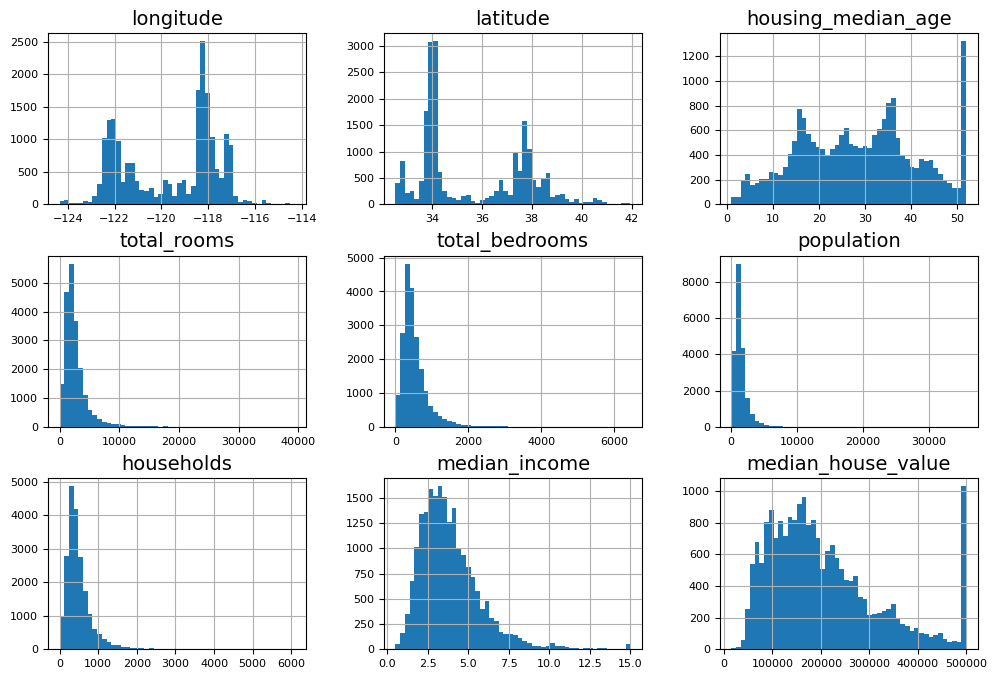

In [6]:
# Vamos ver o histograma de cada atributo numérico
import matplotlib.pyplot as plt

# Ajustando o tamanho das fontes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

housing.hist(bins=50,figsize=(12,8))
plt.show() #opcional no jupyter notebook

A partir do histograma já conseguimos visualizar algumas propriedades interessantes da base:

1. A **mediana de renda** (*median_income*). Nos EUA a renda é mostrada como o valor ganho anualmente. Então, se uma pessoa ganha 5K mensais, sua renda é 60K anuais. Mas no gráfico aparecem de 0.5 até 15 --- o pior é que já deveríamos ter visto isso quando executamos o `housing.describe()`. Em uma situação real você deveria entrar em contato com a empresa, com os responsáveis pela coleta dos dados para saber o que aconteceu neste caso. Supondo que você entrou em contato, a equipe respondeu que os valores foram redimensionados para a faixa de valores entre 0 e 15. Ou seja, não há com o que se preocupar neste caso.
2. Outra característica que chamou atenção foram os plots de `house_median_age` e `median_house_value`. Perceba que há uma quantidade enorme de instâncias para o último valor. Este é, novamente, um caso para vermos com a equipe que coletou os dados. Descobrimos então que as idades acima de 50 anos eram desconsideradas e marcadas como 50, e também valores acima de 500K eram desconsiderados e marcados como 500K. Porém, o atributo `median_house_value` é justamente o que queremos prever. Se utilizarmos os dados como estão agora, nosso modelo pode acabar aprendendo que nenhuma casa passa de 500K de valor (o que não é verdade). O que fazer? Temos duas opções:
   1. Coletar os valores adequados das casas que valem mais de 500K.
   2. Remover todas as instâncias de 500K, o que poderá permitir ao modelo prever valores além disso.
3. Os atributos possuem escalas muito diferentes. É possível lidarmos com isso mais a frente.
4. Alguns histogramas mostram casos de `heavy tails` ou "caudas longas". Esse tipo de distribuição dos dados podem afetar a detecção de padrões, e teremos de nos adaptar a isso.

##### 1.3.2.2 *Scatter plot*

Um *scatter plot* (ou gráfico de dispersão) consiste em um gráfico cartesiano com duas ou três dimensões, em que cada dimensão representa um atributo ou variável do `DataFrame`. Sua característica principal (visualmente) são os pontos, normalmente círculos, evidenciando cada coordenada cartesiana vinda da combinação das variáveis.

[Neste link](https://pandas.pydata.org/docs/reference/frame.html#plotting) você pode acessar a documentação do *scatter plot* e também de outros tipos de gráficos.

<Axes: xlabel='longitude', ylabel='latitude'>

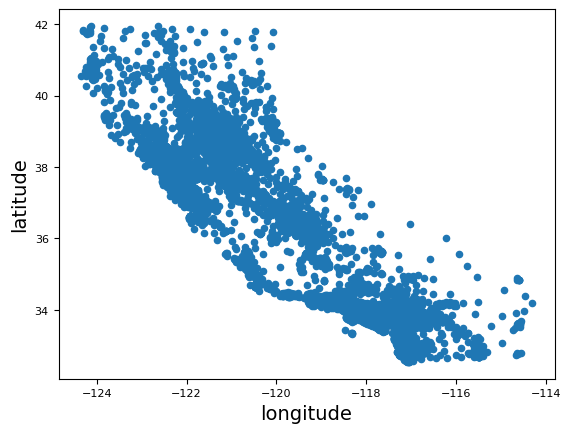

In [7]:
# Criando uma cópia de segurança para manipularmos os dados
copia = housing.copy()

# Gerando um scatter plot simples, a partir de duas variáveis: latitude e longitude
copia.plot(kind="scatter", x="longitude", y="latitude")

Para quem é familiarizado com o mapa da Califórnia, dá para conseguir perceber os contornos do estado. Da forma que fizemos o plot é possível perceber algumas regiões que aparentemente têm uma maior densidade de pontos, mas não dá para ter certeza ainda. Uma forma de conseguir visualizar melhor a densidade é diminuir a opacidade dos círculos. Com círculos quase transparentes, apenas as regiões com bastante densidade continuarão opacas como na figura anterior.

<Axes: xlabel='longitude', ylabel='latitude'>

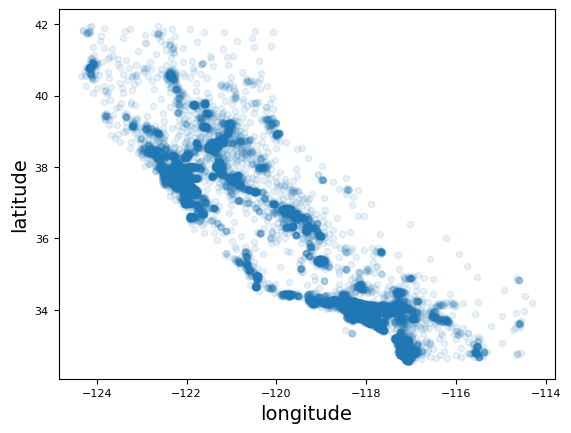

In [8]:
copia.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

A visualização gráfica é limitada pela nossa capacidade de só conseguirmos discenir três dimensões espaciais. Por causa disso, visualizar quatro ou mais atributos de uma vez se torna um desafio. Com criatividade é possível encontrar formas diferentes de se inserir as informações de outros atributos sem necessariamente utilizar mais dimensões espaciais (ter ideias como a do próximo gráfico é uma habilidade que se adquire com o tempo e treino).

Podemos mapear o atributo `população` como um raio para cada círculos e, além disso, podemos mapear o `valor mediano` dos imóveis em uma escala de cores. Com isso poderemos visualizar quatro atributos em apenas duas dimensões.

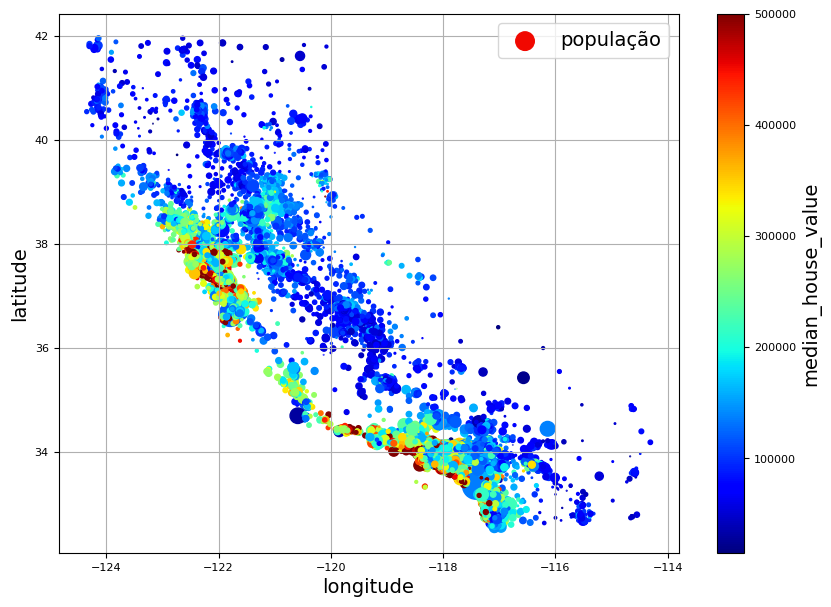

In [9]:
copia.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=copia["population"]/100, label="população", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))

plt.show()

Em seu [github](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb) o autor do livro-texto nos mostra como sobrepor o gráfico anterior com o mapa do Estado da Califórnia:

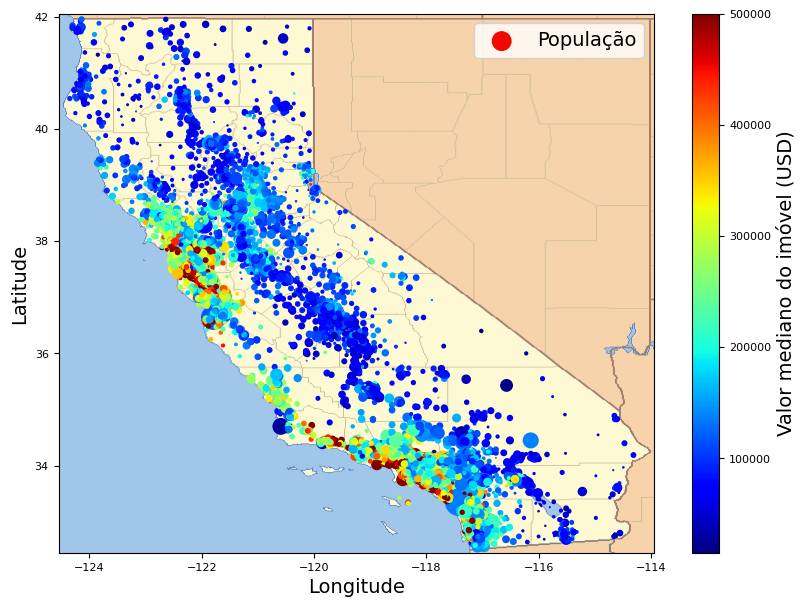

In [11]:
# Renomeando algumas colunas apenas por questões estéticas para o gráfico
copia_renomeada = copia.rename(columns={"latitude": "Latitude", "longitude": "Longitude", "population": "População", "median_house_value": "Valor mediano do imóvel (USD)"})

copia_renomeada.plot(kind="scatter", x="Longitude", y="Latitude", s=copia_renomeada["População"]/100, label="População", c="Valor mediano do imóvel (USD)", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread("../datasets/housing/california.png")
eixos = -124.55, -113.95, 32.45, 42.05
plt.axis(eixos)
plt.imshow(california_img, extent=eixos)

plt.show()

##### 1.3.2.3 Procurando por correlações

Se dois atributos são correlacionados, conseguimos perceber uma dessas duas possibilidades:

* Quanto maior um, maior o outro (correlação ascendente, ou positiva).
* Quanto maior um, menor o outro (correlação descendente, ou negativa).

Podemos fazer essas inferências visualmente, ou de forma mais ortodoxa/pragmática calculando o `coeficiente de correlação padrão` e `linear` (também chamado `r de Pearson`). O coeficiente varia de **-1** a **+1**. Quanto mais próximo do **-1**, mais forte é a correlação negativa. E quanto mais próximo de **+1**, mais forte é a correlação positiva. Próximo de **0** significa que não há correlação.

É importante notar que a correlação entre duas variáveis não implica em **causa**, ou seja, não necessariamente o valor de uma variável causa o valor de outra variável.

Vejamos as correlações entre os atributos da nossa base de dados:

In [12]:
# O método corr vem do Pandas
corr_matrix = copia.corr(numeric_only=True)

In [13]:
# Vejamos a correlação de median_house_value com os outros atributos
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

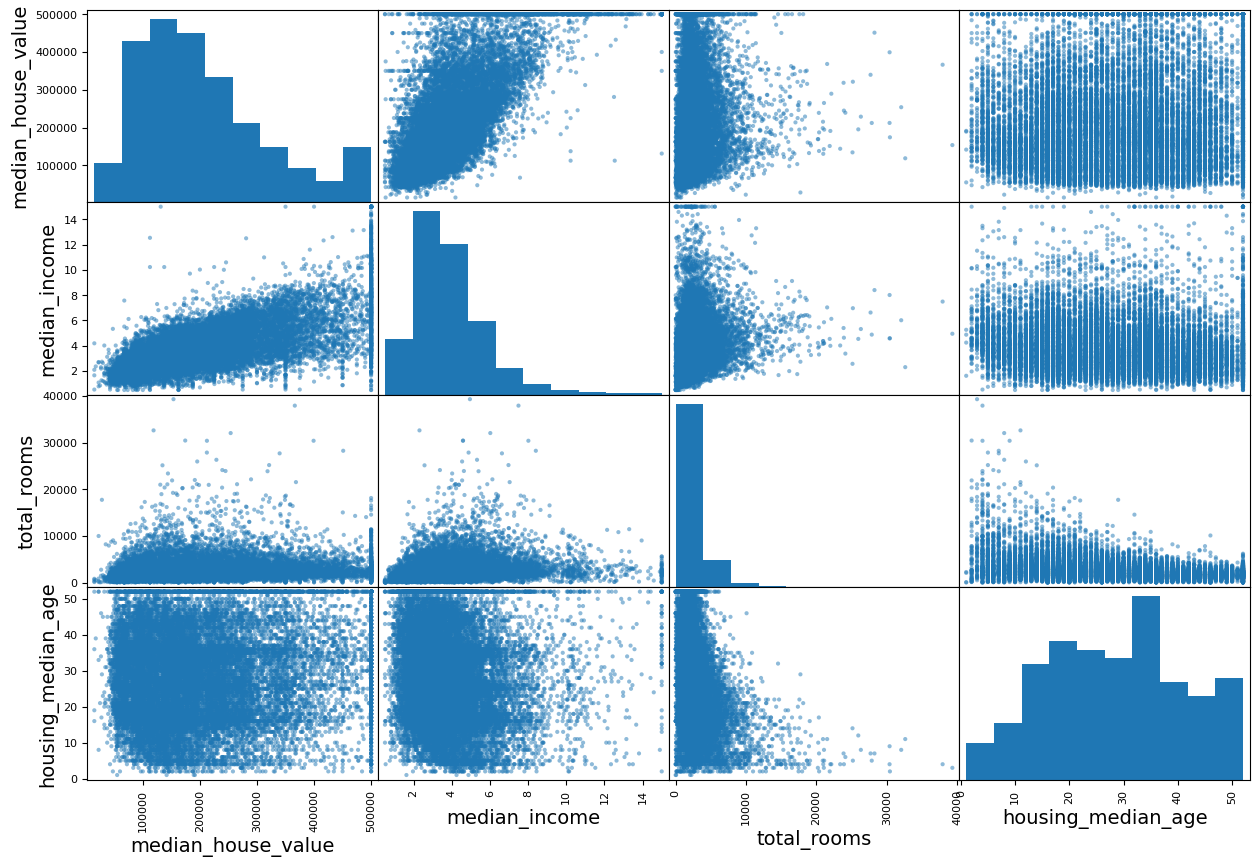

In [14]:
# Correlações entre os atributos

from pandas.plotting import scatter_matrix

atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(copia[atributos], figsize=(15,10))
plt.show()

Vimos tanto pelo `score` quanto visualmente que `median_income` tem relação com `median_house_value`. Vejamos o plot de correlação somente desses dois atributos:

<Axes: xlabel='median_income', ylabel='median_house_value'>

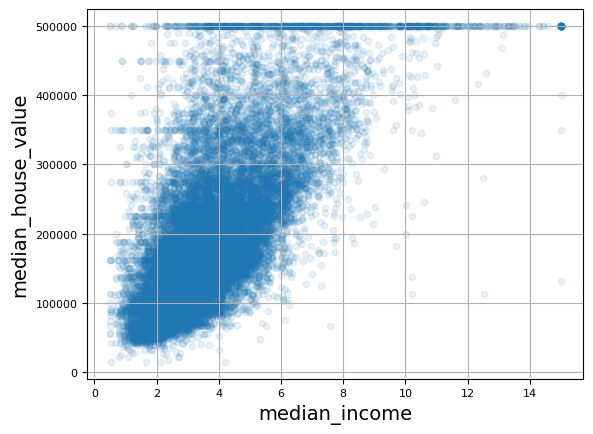

In [15]:
copia.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

As combinações de alguns atributos também podem trazer à tona outras informações interessantes, principalmente ao considerarmos alguns atributos que aparentemente não fornecem boas informações. Por exemplo, saber a quantidade de cômodos não parece ser uma informação útil. Mas saber a quantidade de cômodos por família, pode ser interessante. De forma similar, podemos verificar a quantidade de quartos em relação à quantidade de cômodos. Também, a relação entre população e domicílios pode ser interessante.

In [16]:
# Criando colunas novas, para os atributos que criaremos a partir da combinação de outros
copia["rooms_per_household"] = copia["total_rooms"]/copia["households"]
copia["bedrooms_per_room"] = copia["total_bedrooms"]/copia["total_rooms"]
copia["population_per_household"] = copia["population"]/copia["households"]

In [17]:
# Vamos atualizar a matriz de correlação
corr_matrix = copia.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### 1.4 Preparando os dados para algoritmos de AM

Após analisarmos a nossa base de dados, podemos prepará-la para o aprendizado. Esta etapa de preparação dos dados é chamada de `pré-processamento`.

#### 1.4.1 Separando os conjuntos de treino e teste

Devemos separar os dados em dois conjuntos: **treinamento** e **teste**. Antes da separação em si, é necessário definir o tamanho do **conjunto de teste**, o qual tem de ser grande o suficiente para que possamos ter uma real noção do quão bom é o nosso modelo, mas não grande o bastante para que faltem dados para o treinamento. Em uma aula anterior vimos os métodos mais comuns de divisão de dados.

Neste exemplo vamos usar o método mais simples, que consiste em selecionar aleatoriamente, e sem reposição, instâncias da nossa base para o conjunto de teste até alcançar o tamanho do conjunto de teste. O restante dos dados passam a ser parte do conjunto de treinamento. Para fazer essa separação, podemos utilizar um método do `Scikit-Learn`.

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Talvez você tenha notado o último parâmetro: `random_state`. Esse parâmetro serve para definirmos a `seed` (ou semente) do algoritmo pseudo-aleatório. Ao indicarmos a `seed`, qualquer outra pessoa poderá replicar nossos testes e obter os mesmos resultados, ainda que em vários trechos estejamos selecionando valores "aleatórios".

Para mais informações, acesse os seguintes links: [Wikipedia - Pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator), [Wikipedia - List of random number generators](https://en.wikipedia.org/wiki/List_of_random_number_generators#Pseudorandom_number_generators_(PRNGs)) e [Python - Geração de números pseudo-aleatórios](https://docs.python.org/pt-br/3/library/random.html).

#### 1.4.2 Separando os previsores e rótulos

Após definirmos os conjuntos de treino e teste, para cada instâncias vamos separar também os dados `previsores`, ou seja, os atributos ou colunas que serão utilizadas para o aprendizado, e os `rótulos`, ou seja, os valores alvo.

In [19]:
# Retirando somente uma coluna
atributos_treino = train_set.drop("median_house_value", axis=1)

# Selecionando apenas uma coluna
rotulos_treino = train_set["median_house_value"].copy()

In [20]:
atributos_treino.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND


In [21]:
rotulos_treino.head()

14196    291000.0
8267     156100.0
17445    353900.0
14265    241200.0
2271      53800.0
Name: median_house_value, dtype: float64

#### 1.4.3 Tratando os *missing values*

Agora vamos lidar com os dados/valores faltantes (`missing value`). Um dado/valor faltante é a ausência de um valor em alguma coluna de uma instância. Para lidarmos com eles, temos três opções:

1. Abrir mão das instâncias com `missing values`. Ou seja, simplesmente apagar a(s) linha(s) do conjunto de dados.
2. Abrir mão de todo o atributo. Ou seja, apagar a coluna em todas as instâncias.
3. Definir algum valor. Pode ser
   1. Zero
   2. Média da coluna inteira
   3. Média da coluna, mas apenas das instâncias da mesma classe.
   4. Mediana, etc.

O `pandas` possui métodos para as três opções. Exemplo:

In [22]:
# Selecionando as instâncias com missing values
linhas_null_idx = atributos_treino.isnull().any(axis=1)
atributos_treino.loc[linhas_null_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,NaN,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,NaN,191.0,67.0,1.3897,<1H OCEAN


In [23]:
atributos_op1 = atributos_treino.copy()
atributos_op1.dropna(subset=["total_bedrooms"], inplace=True)
# Como apagamos as instâncias, a execução da linha abaixo vai retornar um erro
atributos_op1.loc["linhas_null_idx"].head()

KeyError: 'linhas_null_idx'

In [24]:
atributos_op2 = atributos_treino.copy()
atributos_op2.drop("total_bedrooms", axis=1, inplace=True)
atributos_op2.loc[linhas_null_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,191.0,67.0,1.3897,<1H OCEAN


In [26]:
atributos_op3 = atributos_treino.copy()
mediana = atributos_treino["total_bedrooms"].median()
#atributos_op3["total_bedrooms"].fillna(mediana, inplace=True)
atributos_op3["total_bedrooms"] = atributos_op3["total_bedrooms"].fillna(mediana)

atributos_op3.loc[linhas_null_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9529,-118.31,33.94,40.0,1550.0,437.0,798.0,270.0,3.7750,<1H OCEAN
16519,-117.86,34.01,16.0,4632.0,437.0,3038.0,727.0,5.1762,<1H OCEAN
19782,-119.75,34.45,6.0,2864.0,437.0,1404.0,603.0,5.5073,NEAR OCEAN
1343,-120.32,37.29,38.0,576.0,437.0,478.0,112.0,2.3382,INLAND
9827,-121.85,36.61,38.0,238.0,437.0,191.0,67.0,1.3897,<1H OCEAN


#### 1.4.4 Lidando atributos categóricos

Na nossa base de dados a última coluna possui valores categóricos expressados textualmente. No início desse documento chegamos até a ver os diferentes valores categóricos, além da quantidade de instâncias para cada um. Vamos revê-los:

In [32]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [35]:
# Por questões didáticas vamos separar essa coluna
housing_cat = housing[["ocean_proximity"]]
# Selecionando a coluna dessa maneira, com duplo colchete, cria um novo DataFrame, o qual conterá somente essa coluna.

Os modelos de AM trabalham melhor com números. Portanto, podemos transformar cada categoria em um valor numérico diferente. O `Scikit-Learn` fornece a classe `OrdinalEncoder` para essa tarefa:

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() # instanciando a classe

housing_ordinal_encoder = ordinal_encoder.fit_transform(housing_cat)
housing_ordinal_encoder[:10] 
# Perceba que não foi usado o método head, pois housing_ordinal_encoder é um array, e não um DataFrame.

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [39]:
# Lista das categorias
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

No nosso exemplo, as categorias foram transformadas da seguinte forma:

* <1H OCEAN : &emsp;&ensp;&nbsp; 0
* INLAND : &emsp;&emsp;&emsp;&ensp; 1
* ISLAND : &emsp;&emsp;&emsp;&ensp;&nbsp; 2
* NEAR BAY : &emsp;&emsp;&ensp; 3
* NEAR OCEAN : &emsp; 4

Os algoritmos de AM assumem que valores próximos são mais semelhantes entre si. Em uma situação onde as categorias são ordenadas (e.g., *ruim*, *médio*, *bom*, *excelente*) esse comportamento é bem-vindo. Contudo, no nosso caso específico, esta não é a melhor solução, pois as categorias não estão ordenadas.

Por exemplo, as categorias `<1H OCEAN` (<1H PARA O OCEANO) e `INLAND` (INTERIOR) serão percebidas como mais próximas entre si do que `<1H OCEAN` (<1H PARA O OCEANO) e `NEAR OCEAN` (PRÓXIMO AO OCEANO).

Duas soluções são possíveis neste caso:

1. Os atributos são ordenados manualmente.
2. Outro mapeamento é utilizado.

Em uma situação onde há uma ordenação evidente, a primeira opção pode ser uma boa escolha, principalmente se não for necessária muitas operações de manipulação dos dados. Porém, em muitos casos não é possível (ao menos de início) perceber uma ordenação natural das categorias. Neste caso, o melhor é utilizarmos outra forma de mapear as categorias.

Uma solução bastante utilizada é a `one-hot encoder`, a qual transforma os dados categóricos em valores binários. A quantidade de bits é equivalente à quantidade de categorias e cada categoria terá o bit 1 em uma posição diferente. Ex.:

* <1H OCEAN : &emsp;&ensp;&nbsp; 10000
* INLAND : &emsp;&emsp;&emsp;&ensp; 01000
* ISLAND : &emsp;&emsp;&emsp;&ensp;&nbsp; 00100
* NEAR BAY : &emsp;&emsp;&ensp; 00010
* NEAR OCEAN : &emsp; 00001

In [42]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder() # instanciando

housing_1hot_encoder = onehot_encoder.fit_transform(housing_cat)
housing_1hot_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

Por padrão a classe `OneHotEncoder` retorna um *sparse array* (ou vetor esparso), ou seja, em vez dos 5 bits, é armazenado somente a posição do bit 1, ignorando os 0s.

Mas caso você queira ver os 0s, é possível utilizar o método `toarray`.

In [43]:
housing_1hot_encoder.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#### 1.4.5 Escalonamento das características

Uma [leitura recomendada](https://medium.com/@jeapsilva/quando-utilizar-standardscaler-minmaxscaler-e-robustscaler-em-machine-learning-788de8b157ca).

Enquanto visualizávamos os dados, foi possível observar que cada atributo possui escalas de valores diferentes. Por exemplo, o número total de cômodos varia de 6 a 39320, enquanto a renda mediana varia de 0 a 15. Os algoritmos de AM costumam não funcionar adequadamente quando os atributos numéricos têm escalas muito diferentes.

Existem dois principais algoritmos de escalonamento: `Escalonamento Padrão` (*Standard Scaler*, ou padronização) e o `MinMax` (também conhecido como normalização).

A `padronização` resultará em valores com **média 0** e **desvio-padrão 1**, enquanto que a `normalização` resultará em valores variando entre **0 e 1** ou outra faixa que você tenha escolhido (normalmente entre -1 e 1).

##### 1.4.5.1 Padronização

Equação: $x_{i} = \dfrac{x_{i} - \mu(x)}{\sigma}$, onde

* $x_{i}$: valor a ser escalonado/reescalado;
* $\mu(x)$: média dos valores;
* $\sigma$: desvio padrão.

<div style="text-align: center;">
    <img src="imagens/standardscale.png"><br>
    <caption>Figura 02: Figura à esquerda mostra os dados brutos. A figura à direita mostra os dados reescalados com a padronização (<a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html">fonte: scikit-learn</a>)</caption>
</div>

In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np

housing_numeric = housing.select_dtypes(include=[np.number])

std_scaler = StandardScaler()
housing_num_std_scaler = std_scaler.fit_transform(housing_numeric)

In [46]:
housing_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [47]:
housing_num_std_scaler

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

##### 1.4.5.2 Normalização

Equação: $x_{i} = \dfrac{x_{i} - min(x)}{max(x) - min(x)}$, onde

* $x_{i}$: valor a ser escalonado/reescalado;
* $min(x)$: valor mínimo da nova escala;
* $max(x)$: valor máximo da nova escala.

<div style="text-align: center;">
    <img src="imagens/minmaxscale.png"><br>
    <caption>Figura 03: Figura à esquerda mostra os dados brutos. A figura à direita mostra os dados reescalados com a normalização (<a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html">fonte: scikit-learn</a>)</caption>
</div>

In [48]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
housing_num_minmax = min_max_scaler.fit_transform(housing_numeric)

In [49]:
housing_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [50]:
housing_num_minmax

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.90226638],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.70824656],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.69505074],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.15938285],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.14371281],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.15340349]])

### 1.5 Selecionando e treinando um modelo

